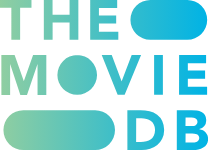

# IMDb Movies Analysis and Predictions

## Business Problem:
For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.

### Source:  
#### https://datasets.imdbws.com/ .gz

We will focus on the following data files: <br> 
**title.basics.tsv.gz** <br>
**title.ratings.tsv.gz** <br>
**title.akas.tsv.gz** <br>

### Data Dictionary:  

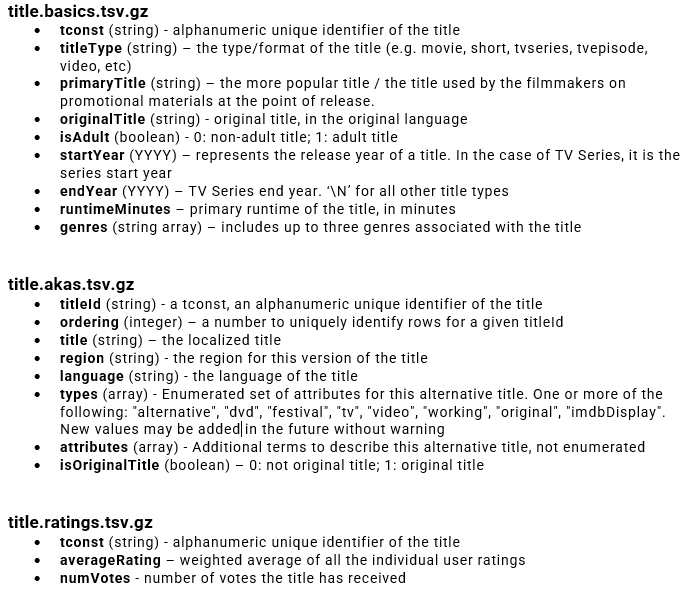

### Part 1:  
***
#### Download several files from IMDB’s movie data set and filter out the subset of moves requested by the stakeholder.

#### **1. Libraries**

In [1]:
import pandas as pd
import numpy as np
import os

#### **2. Import Data**

In [2]:
basics_url="https://datasets.imdbws.com/title.basics.tsv.gz"
akas_url="https://datasets.imdbws.com/title.akas.tsv.gz"
ratings_url="https://datasets.imdbws.com/title.ratings.tsv.gz"

In [3]:
basics = pd.read_csv(basics_url, sep='\t', low_memory=False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319916 entries, 0 to 10319915
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 708.6+ MB


In [5]:
akas = pd.read_csv(akas_url, sep='\t', low_memory=False)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [6]:
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37787046 entries, 0 to 37787045
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.3+ GB


In [7]:
ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
2,tt0000003,6.5,1912
3,tt0000004,5.5,178
4,tt0000005,6.2,2692


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369534 entries, 0 to 1369533
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1369534 non-null  object 
 1   averageRating  1369534 non-null  float64
 2   numVotes       1369534 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.3+ MB


#### **3. Preprocessing (Filtering/Cleaning)**

- **Akas**

In [9]:
# Include only movies that were released in the United States
akas = akas[akas['region'] == 'US']

In [10]:
# Replace "\N" with np.nan
akas = akas.replace({'\\N':np.nan})
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0


- **Title Basics**

In [11]:
# Replace "\N" with np.nan
basics = basics.replace({'\\N':np.nan})
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [12]:
# Change startYear to a float 
basics['startYear'] = basics['startYear'].astype(float) 
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319916 entries, 0 to 10319915
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         object 
 5   startYear       float64
 6   endYear         object 
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(1), object(8)
memory usage: 708.6+ MB


In [13]:
# Exclude any movie with missing values for genre or runtime
basics = basics.dropna(subset=['runtimeMinutes', 'genres'])

In [14]:
# Include only full-length movies (titleType = "movie").
basics = basics[basics['titleType'] == 'movie']

In [15]:
# Include only fictional movies (not from documentary genre)
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

In [16]:
# Include only movies that were released 2000 - 2021 (include 2000 and 2021)
basics = basics[(basics['startYear'].between(2000, 2022))]

In [17]:
# Filter the basics table down to only include the US by using the filter akas dataframe
# (Filtering one dataframe based on another)
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]

- **Ratings**

In [18]:
ratings.replace(r'\\N', np.nan, inplace=True)
ratings = ratings[ratings['tconst'].isin(akas['titleId'])]

In [19]:
# Replace "\N" with np.nan
ratings = ratings.replace({'\\N':np.nan})
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
4,tt0000005,6.2,2692
5,tt0000006,5.0,182
6,tt0000007,5.4,841


#### **4. Creating a "Data" folder**

In [20]:
# Making a new folder with os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['akas.csv.gz', 'ratings.csv.gz', 'title_basics.csv.gz']

#### **5.Run a final .info() for each of the dataframes to show a summary of how many movies remain and the datatypes of each feature**

In [21]:
# Title_Basics
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87502 entries, 34800 to 10319682
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          87502 non-null  object 
 1   titleType       87502 non-null  object 
 2   primaryTitle    87502 non-null  object 
 3   originalTitle   87502 non-null  object 
 4   isAdult         87502 non-null  object 
 5   startYear       87502 non-null  float64
 6   endYear         0 non-null      object 
 7   runtimeMinutes  87502 non-null  object 
 8   genres          87502 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.7+ MB


In [22]:
# Akas
akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477588 entries, 5 to 37786790
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1477588 non-null  object
 1   ordering         1477588 non-null  int64 
 2   title            1477588 non-null  object
 3   region           1477588 non-null  object
 4   language         4213 non-null     object
 5   types            985643 non-null   object
 6   attributes       47740 non-null    object
 7   isOriginalTitle  1476247 non-null  object
dtypes: int64(1), object(7)
memory usage: 101.5+ MB


In [23]:
# Ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514305 entries, 0 to 1369510
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         514305 non-null  object 
 1   averageRating  514305 non-null  float64
 2   numVotes       514305 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.7+ MB


#### **6. Saving Compressed .csv.gz Files as CSV**

In [24]:
## Save current dataframe to file.
basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)
akas.to_csv("Data/akas.csv.gz",compression='gzip',index=False)
ratings.to_csv("Data/ratings.csv.gz",compression='gzip',index=False)

#### **6. Read CSV files**

In [25]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008.0,NaN,94,Horror
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [26]:
akas = pd.read_csv("Data/akas.csv.gz", low_memory = False)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [27]:
ratings = pd.read_csv("Data/ratings.csv.gz", low_memory = False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
2,tt0000005,6.2,2692
3,tt0000006,5.0,182
4,tt0000007,5.4,841
